# FAQ 11.1 Figure 1

* mean vs. extreme temperature and precipitation

Author: Mathias Hauser

In [1]:
import cartopy.crs as ccrs
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplotutils as mpu
import numpy as np

import conf
import data_tables
from utils import computation, plot, transform, save_figuredata

In [2]:
mpl.rcParams["font.sans-serif"] = "Arial"
mpl.rc("font", size=9)

In [3]:
FIGURE_FOLDER = "FAQ_11.1_Figure_1"

plot.create_figure_folders(FIGURE_FOLDER, conf.cmip6)

## Load data

In [4]:
c6_tas = conf.cmip6.load_post_all_concat(varn="tas", postprocess="global_mean")

 -- {'varn': 'tas', 'postprocess': 'global_mean', 'table': 'Amon', 'model': 'IITM-ESM', 'exp': 'ssp370', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}: no data for 2099 - 2099 (1850..2098)


In [5]:
c6_txx = conf.cmip6.load_post_all_concat(varn="tasmax", postprocess="txx_regrid")

-- no data found for: {'exp': 'historical', 'varn': 'tasmax', 'postprocess': 'txx_regrid', 'table': 'day', 'model': 'EC-Earth3', 'ens': 'r4i1p1f1', 'grid': 'gr', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'tasmax', 'postprocess': 'txx_regrid', 'table': 'day', 'model': 'IITM-ESM', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'tasmax', 'postprocess': 'txx_regrid', 'table': 'day', 'model': 'GISS-E2-1-G', 'ens': 'r1i1p5f2', 'grid': 'gn', 'ensnumber': 0}
 -- {'varn': 'tasmax', 'postprocess': 'txx_regrid', 'table': 'day', 'model': 'BCC-ESM1', 'exp': 'ssp370', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}: no data for 2099 - 2099 (1850..2055)
 -- {'varn': 'tasmax', 'postprocess': 'txx_regrid', 'table': 'day', 'model': 'MPI-ESM-1-2-HAM', 'exp': 'ssp370', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}: no data for 2099 - 2099 (1850..2055)


In [6]:
c6_rx1day_abs = conf.cmip6.load_post_all_concat(
    varn="pr", postprocess="rx1day_regrid", anomaly="no_anom"
)

-- no data found for: {'exp': 'historical', 'varn': 'pr', 'postprocess': 'rx1day_regrid', 'table': 'day', 'model': 'EC-Earth3', 'ens': 'r4i1p1f1', 'grid': 'gr', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'pr', 'postprocess': 'rx1day_regrid', 'table': 'day', 'model': 'AWI-CM-1-1-MR', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'pr', 'postprocess': 'rx1day_regrid', 'table': 'day', 'model': 'AWI-CM-1-1-MR', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'pr', 'postprocess': 'rx1day_regrid', 'table': 'day', 'model': 'GISS-E2-1-G', 'ens': 'r1i1p5f2', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'pr', 'postprocess': 'rx1day_regrid', 'table': 'day', 'model': 'AWI-CM-1-1-MR', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}
 -- {'varn': 'pr', 'postprocess': 'rx1day_regrid', 'table': 'day', 'model': 'BCC-ESM1', 'exp': 'ssp37

In [7]:
c6_tas_monthly = conf.cmip6.load_post_all_concat(
    varn="tas",
    postprocess="monthly_regrid",
    exp=None,
    anomaly="no_anom",
    year_mean=False,
)

-- no data found for: {'exp': 'historical', 'varn': 'tas', 'postprocess': 'monthly_regrid', 'table': 'Amon', 'model': 'EC-Earth3', 'ens': 'r4i1p1f1', 'grid': 'gr', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'tas', 'postprocess': 'monthly_regrid', 'table': 'Amon', 'model': 'GISS-E2-1-G', 'ens': 'r1i1p1f2', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'tas', 'postprocess': 'monthly_regrid', 'table': 'Amon', 'model': 'GISS-E2-1-G', 'ens': 'r1i1p1f2', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'tas', 'postprocess': 'monthly_regrid', 'table': 'Amon', 'model': 'MCM-UA-1-0', 'ens': 'r1i1p1f2', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'tas', 'postprocess': 'monthly_regrid', 'table': 'Amon', 'model': 'GISS-E2-1-G', 'ens': 'r1i1p1f2', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'tas', 'postprocess': 'monthly_regrid', '

In [8]:
c6_pr_monthly = conf.cmip6.load_post_all_concat(
    varn="pr",
    postprocess="monthly_regrid",
    exp=None,
    anomaly="no_anom",
    year_mean=False,
)

-- no data found for: {'exp': 'historical', 'varn': 'pr', 'postprocess': 'monthly_regrid', 'table': 'Amon', 'model': 'EC-Earth3', 'ens': 'r4i1p1f1', 'grid': 'gr', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'pr', 'postprocess': 'monthly_regrid', 'table': 'Amon', 'model': 'GISS-E2-1-G', 'ens': 'r1i1p1f2', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'pr', 'postprocess': 'monthly_regrid', 'table': 'Amon', 'model': 'GISS-E2-1-G', 'ens': 'r1i1p1f2', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'pr', 'postprocess': 'monthly_regrid', 'table': 'Amon', 'model': 'MCM-UA-1-0', 'ens': 'r1i1p1f2', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'pr', 'postprocess': 'monthly_regrid', 'table': 'Amon', 'model': 'GISS-E2-1-G', 'ens': 'r1i1p1f2', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'pr', 'postprocess': 'monthly_regrid', 'table'

#### Rx1day: calculate anomalies

In [9]:
c6_rx1day = computation.process_datalist(
    computation.calc_anomaly, c6_rx1day_abs, start=1850, end=1900, how="absolute"
)

c6_rx1day_rel = computation.process_datalist(
    computation.calc_anomaly, c6_rx1day_abs, start=1850, end=1900, how="relative"
)

### Calculate 3 warmest consecutive months

In [10]:
trans = transform.ConsecutiveMonthsClim("tas", how="max", clim=slice("1850", "1900"))

summer_months = computation.process_datalist(trans, c6_tas_monthly)

### Plot summer months of an example dataset

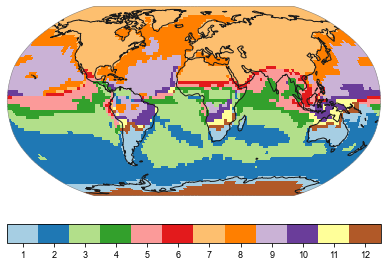

In [11]:
d = summer_months[9][0]

f, ax = plot.map_subplots()

h = plot.one_map_flat(
    d.central_month, ax, levels=np.arange(0.5, 12.6, 1), cmap="Paired"
)

cbar = mpu.colorbar(h, ax, orientation="horizontal", extend="neither")
cbar.set_ticks(range(1, 13))

mpu.set_map_layout(ax)

In [12]:
ds = c6_tas_monthly[0][0]

ds_s = summer_months[0][0]

In [13]:
g = ds.tas.groupby("time.month")

d = g.where(ds_s.month_mask)

In [14]:
def calc_summer_months_mean(ds, meta, summer_months_list):
    """calculate the mean over summer means
    
    Parameters
    ----------
    ds : xr.Dataset
        Dataset to calculate the summer months for.
    meta : metadata
        Metadata belonging to ds.
    summer_month_list : datalist
        Datalist with the summer months data, to be selected
        for ds (via meta).    
    """

    select_by = ("model", "exp", "ens")
    attributes = {key: meta[key] for key in select_by}

    # try to find the index
    summer_months = computation.select_by_metadata(summer_months_list, **attributes)

    # make sure only one dataset is found in index_list
    if len(summer_months) > 1:
        raise ValueError("Found more than one dataset:\n", meta)
    elif len(summer_months) == 0:
        print("skipped")
        return []

    # unpack list
    summer_months = summer_months[0]
    # unpack ds, meta
    summer_months = summer_months[0]

    # set non-summer months to <NA>
    ds = ds.groupby("time.month").where(summer_months.month_mask)

    # do a rolling mean so we don't combine JF......D from one year
    # but calculate DJF over 2 years, assigning it to the year of J
    # then do a annual mean
    return ds.rolling(time=3, center=True).mean().groupby("time.year").mean("time")

In [15]:
c6_tas_summer = computation.process_datalist(
    calc_summer_months_mean,
    c6_tas_monthly,
    pass_meta=True,
    summer_months_list=summer_months,
)

In [16]:
c6_pr_summer = computation.process_datalist(
    calc_summer_months_mean,
    c6_pr_monthly,
    pass_meta=True,
    summer_months_list=summer_months,
)

### pr_summer & tas_summer: calculate anomalies

In [17]:
c6_tas_summer_abs = computation.process_datalist(
    computation.calc_anomaly, c6_tas_summer, start=1850, end=1900, how="absolute"
)


c6_pr_summer_rel = computation.process_datalist(
    computation.calc_anomaly, c6_pr_summer, start=1850, end=1900, how="relative"
)

## At warming levels

In [18]:
warming_levels = [1.5, 2.0, 4.0]

c6_txx_at_warming = computation.at_warming_levels_list(c6_tas, c6_txx, warming_levels)

# c6_rx1day_at_warming = computation.at_warming_levels_list(
#     c6_tas, c6_rx1day, warming_levels, factor=3600*24
# )

c6_rx1day_rel_at_warming = computation.at_warming_levels_list(
    c6_tas, c6_rx1day_rel, warming_levels
)

In [19]:
c6_tas_summer_at_warming = computation.at_warming_levels_list(
    c6_tas, c6_tas_summer_abs, warming_levels
)


c6_pr_summer_rel_at_warming = computation.at_warming_levels_list(
    c6_tas, c6_pr_summer_rel, warming_levels
)

## FAQ 11.1 Figure 1

### tas/ txx & pr/ rx1day relative

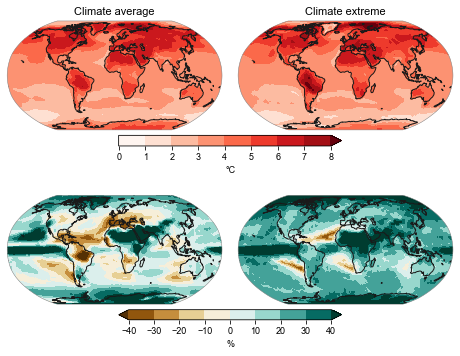

In [20]:
f, axes = plt.subplots(2, 2, subplot_kw=dict(projection=ccrs.Robinson()))
axes = axes.flatten()

cbar_kwargs = dict(orientation="horizontal", pad=0.05, shrink=0.5)


opt = dict(extend="max", add_n_models=False, plotfunc="contourf")


# ====

ax = axes[0]

levels = np.arange(0, 8.1, 1)

da = c6_tas_summer_at_warming[2]
h, _ = plot.one_map(da, ax, "median", levels=levels, cmap="Reds", **opt)
ax.set_title("Climate average", fontsize=11)

# ====

ax = axes[1]

da = c6_txx_at_warming[2]
h, _ = plot.one_map(da, ax, "median", levels=levels, cmap="Reds", **opt)

ax.set_title("Climate extreme", fontsize=11)

cbar = mpu.colorbar(h, axes[0], axes[1], **cbar_kwargs)
cbar.set_label("°C")

# ====
opt["extend"] = "both"

# ====


ax = axes[2]

levels = np.arange(-40, 41, 10)

da = c6_pr_summer_rel_at_warming[2]
h, _ = plot.one_map(da, ax, "median", levels=levels, cmap="BrBG", **opt)

# ====


ax = axes[3]

da = c6_rx1day_rel_at_warming[2]
h, _ = plot.one_map(da, ax, "median", levels=levels, cmap="BrBG", **opt)

cbar = mpu.colorbar(h, axes[2], axes[3], **cbar_kwargs)
cbar.set_label("%")

# ====

plt.subplots_adjust(
    wspace=0.075, hspace=0.6, left=0.05, right=1 - 0.025, bottom=0.15, top=0.9
)

mpu.set_map_layout(axes)

f.canvas.draw()

fN = conf.cmip6.figure_filename(
    "FAQ_11.1_Figure_1_mean_vs_extreme", "FAQ_11.1_Figure_1", add_prefix=False
)
plt.savefig(fN + ".png", dpi=300, facecolor="w")
plt.savefig(fN + ".pdf", dpi=400)


# data tables
fN = conf.cmip6.figure_filename(
    "FAQ_11.1_Figure_1_mean_vs_extreme", "FAQ_11.1_Figure_1", "data_tables", add_prefix=False
)

data_tables.save_simulation_info_raw(
    fN + "_a_md_raw", c6_tas_summer_at_warming[2], panel="a"
)
data_tables.save_simulation_info_raw(fN + "_b_md_raw", c6_txx_at_warming[2], panel="b")
data_tables.save_simulation_info_raw(
    fN + "_c_md_raw", c6_pr_summer_rel_at_warming[2], panel="c"
)
data_tables.save_simulation_info_raw(
    fN + "_d_md_raw", c6_rx1day_rel_at_warming[2], panel="d"
)


# save figure data
# ================

warming_level = 4.0
figure = "FAQ 11.1 Figure 1"

data = [
    c6_tas_summer_at_warming[2],
    c6_txx_at_warming[2],
    c6_pr_summer_rel_at_warming[2],
    c6_rx1day_rel_at_warming[2],
]

varns = ["summer_temperature", "TXx", "summer_prec", "Rx1day"]
panels = ["a", "b", "c", "d"]
units = ["°C", "°C", "%", "%"]
long_name = [
    "Near-Surface Air Temperature",
    "Annual maximum temperature",
    "Precipitation",
    "Annual maximum 1-day precipitation",
]


for i in range(4):

    dta_ = data[i]
    varn = varns[i]
    panel = panels[i]
    unit = units[i]

    dta_.attrs["long_name"] = long_name[i]
    dta_.attrs["comment"] = "anomaly wrt 1850-1900"

    sfd = save_figuredata.SaveFiguredata(
        figure=figure,
        units=unit,
        varn=varn,
    )

    ds = sfd.map_panel(
        da=dta_,
        average="median",
        panel=panel,
        warming_level=warming_level,
        hatch_simple=None,
    )

    fN = conf.cmip6.figure_filename(
        f"{figure.replace(' ', '_')}{panel}_cmip6_{varn}_change_at_{warming_level:0.1f}C.nc",
        FIGURE_FOLDER,
        "figure_data",
        add_prefix=False,
    )
    ds.to_netcdf(fN)